In [1]:
%matplotlib inline

import copy
import matplotlib.pyplot as pyplot

import numpy as np

import geopandas as gpd
import shapely.geometry as geom
import shapely.affinity as affine

import sys
sys.path.insert(0, "../")
from weavingspace import Topology
from weavingspace import TileUnit
from weavingspace import TileShape
from weavingspace import WeaveUnit
from weavingspace import tiling_utils
from weavingspace import Symmetries
from weavingspace import Shape_Matcher

While the `Topology` class is still under development, this notebook is a testbed for it. At present it is still not quite right - e.g. it mislabels Archimedean 3.12.12. **Update**: the problem with (3.12.12) was in the construction which resulted in the two triangles being different sizes... presumably because the dual tiling method is not... uh... perfect. With a 'from scratch' constructor for (3.12.12) added to `tiling_geometries` it's fine - geometrically at least. It mislabels the tiles in the dual, and also does not guarantee their contiguity.

In [2]:
s = 1000 / np.sqrt(2)
tile = TileUnit(base_shape = TileShape.RECTANGLE, spacing = 1000)
poly = geom.Polygon([(0, 0), (0, s/2), (s/2, s/2), (s/2, -s/2), (-s/2, -s/2), (-s/2, 0)])
tile.tiles = gpd.GeoDataFrame(
  data = {"tile_id": ["a"]}, 
  geometry = gpd.GeoSeries([poly]),
  crs = 3857)
tile.setup_vectors((-s/2, s/2), (s, s/2))
tile._setup_regularised_prototile()

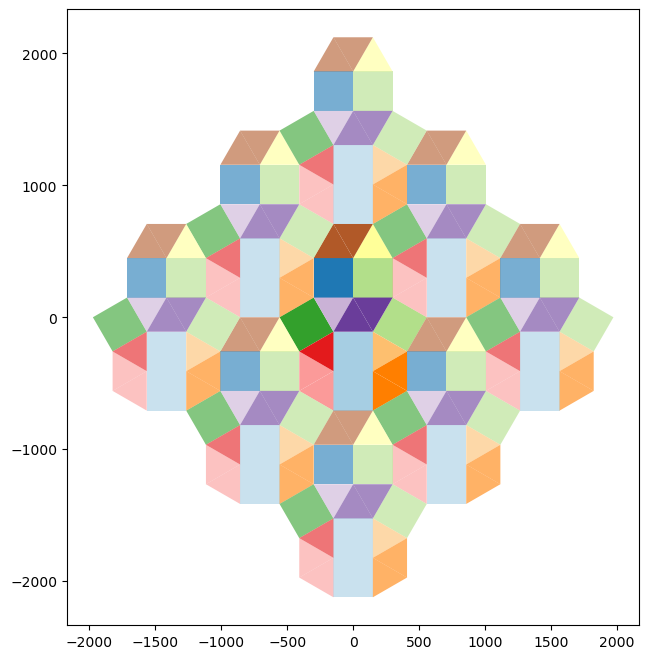

In [197]:
# tile = TileUnit(tiling_type = "lave", code = "4.6.12", spacing = 1000)
tile = TileUnit(tiling_type = "chavey", code = "d")
# tile = TileUnit(tiling_type = "star2", code = "66", point_angle = 30)
# tile = TileUnit(tiling_type = "hex-dissection", n = 9, offset = 0, offset_angle = -60)
# tile = TileUnit(tiling_type = "hex-slice", n = 9, offset = 1)
# tile = TileUnit(tiling_type = "archimedean", code = "3.4.6.4")
# tile = TileUnit(tiling_type = "archi", code = "3.12.12")
# tile = TileUnit(tiling_type = "archimedean", code = "4.8.8")
# tile = TileUnit(tiling_type = "cairo", n = 3)
# tile = TileUnit(tiling_type = "square-colouring", n = 4) #.transform_skew(20).transform_scale(1.2)
# tile = TileUnit(tiling_type = "hex-colouring", n = 2).transform_rotate(90)
# tile = WeaveUnit(weave_type = "plain", n = 2, strands = "a|d", aspect = 1)
# tile = WeaveUnit(weave_type = "basket", n = 3, strands = "abc|def", spacing = 200)
# tile = WeaveUnit(weave_type = "twill", n = 2, strands = "ac|bd")
# tile = TileUnit(base_shape = TileShape.TRIANGLE)
ax = tile.plot(r = 1, show_reg_prototile = False, show_prototile = False, cmap = "Paired", show_ids = False, r_alpha = 0.6, show_vectors = False)

In [198]:
topo = Topology(tile, True)

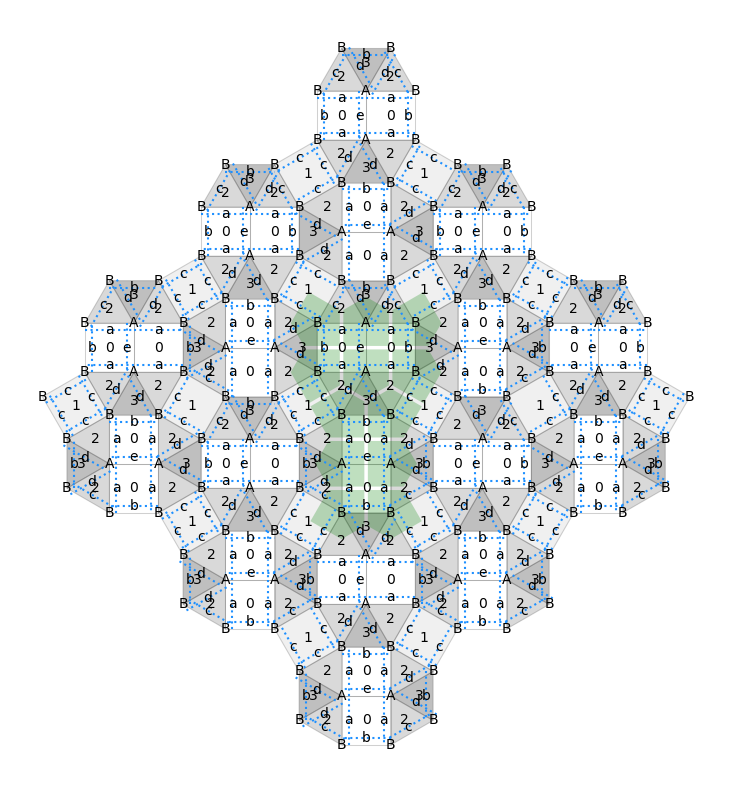

In [199]:
ax = topo.plot(
  show_original_tiles = True,
  show_tile_centres = True,
  show_vertex_labels = True,
  show_edge_labels = True,
  show_edges = True,
  offset_edges = True,
  show_dual_tiles = True,
)

## Modifying a tiling

CAUTION: new Topology will probably not be correctly labelled. To build a 
correct Topology, extract the tileable attribute and rebuild Topology from that.



<Axes: >

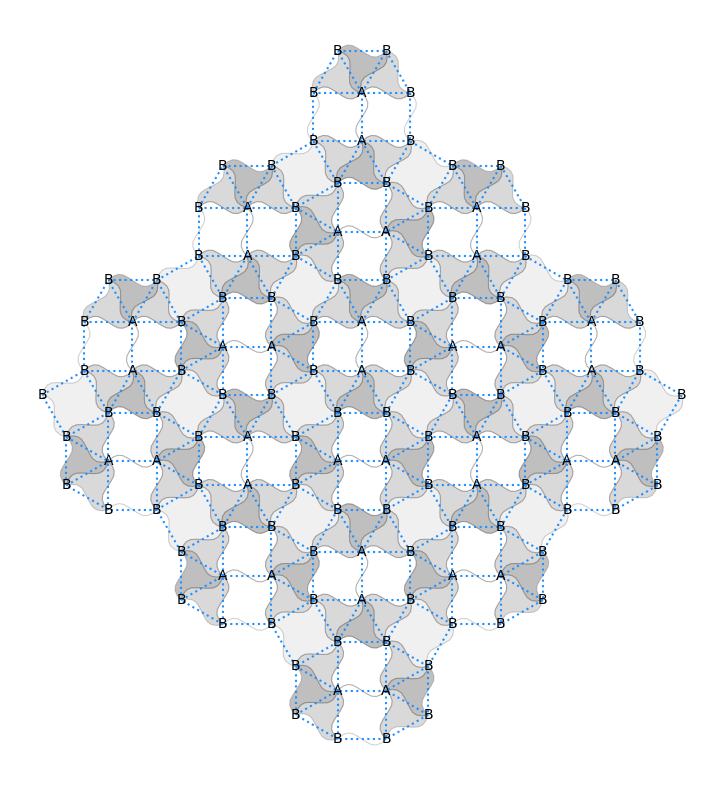

In [200]:
topo2 = topo \
  .transform_geometry(True, True, "abcdefghijklm", "zigzag_edge", n = 2, h = 0.25, smoothness = 3)
topo2.plot(offset_edges=False)

Note that some tiles around the outside might not get 'deformed' correctly because they are unconstrained by neighbours (I think...), but the central tile unit should be fine. To see the potential new tiling we do this:

<Axes: >

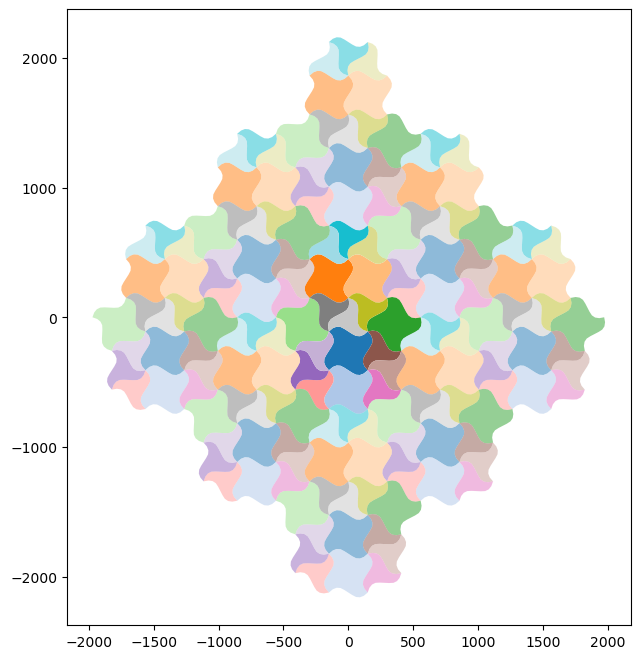

In [201]:
tile_unit = topo2.tileable
tile_unit.plot(r = 1, show_prototile = False, show_reg_prototile = False, 
               r_alpha = 0.5, cmap = "tab20", show_ids = False)

## Tiling symmetries
As discovered in topology construction.

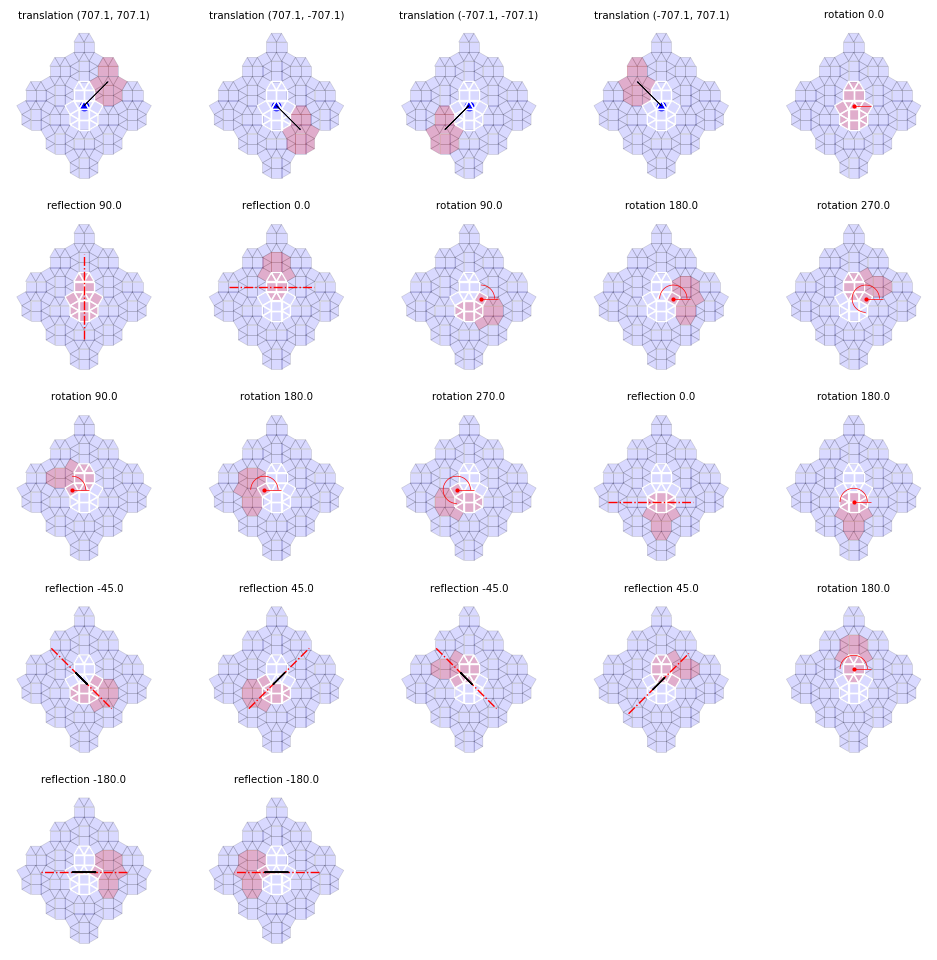

In [202]:
topo.plot_tiling_symmetries(mirror_length = 2500, radius = 400, c = geom.Point(0, 0), )

## Dual tiling from the topology

<Axes: >

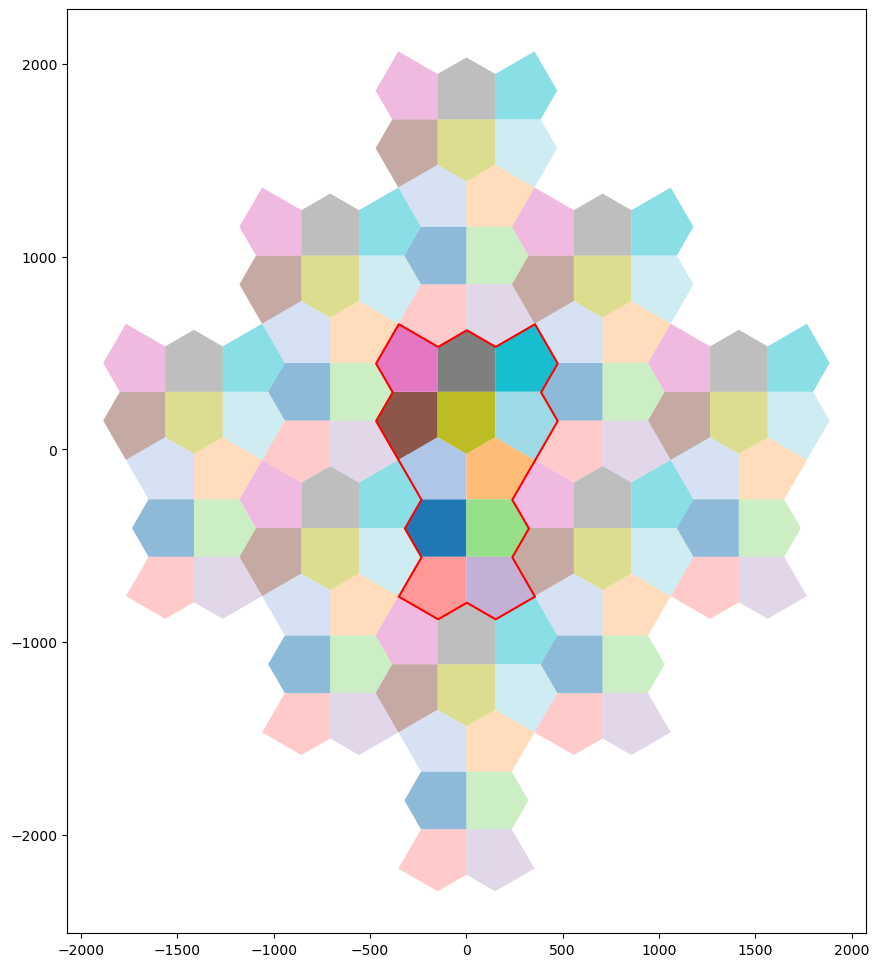

In [203]:
tile2 = copy.deepcopy(topo.tileable)
dual_tiles = list(topo.dual_tiles.values())
tile2.tiles = gpd.GeoDataFrame(
  data = {"tile_id": list("abcdefghijklmnopqrstuvwxyz")[:len(dual_tiles)]},
  geometry = gpd.GeoSeries(dual_tiles))
tile2._setup_regularised_prototile(override = True)
tile2.plot(r = 1, show_reg_prototile = True, show_prototile = False, show_vectors = False,
           cmap = "tab20", show_ids = False, figsize = (12, 12)) #, ec = "k")

It's great that `Topology` can make a dual tiling the more home-spun `tiling_utils.get_dual_tile_unit()` can also do this, and... at least for now, it is better at determining which tiles in the dual are need to exhaust the plane.

<Axes: >

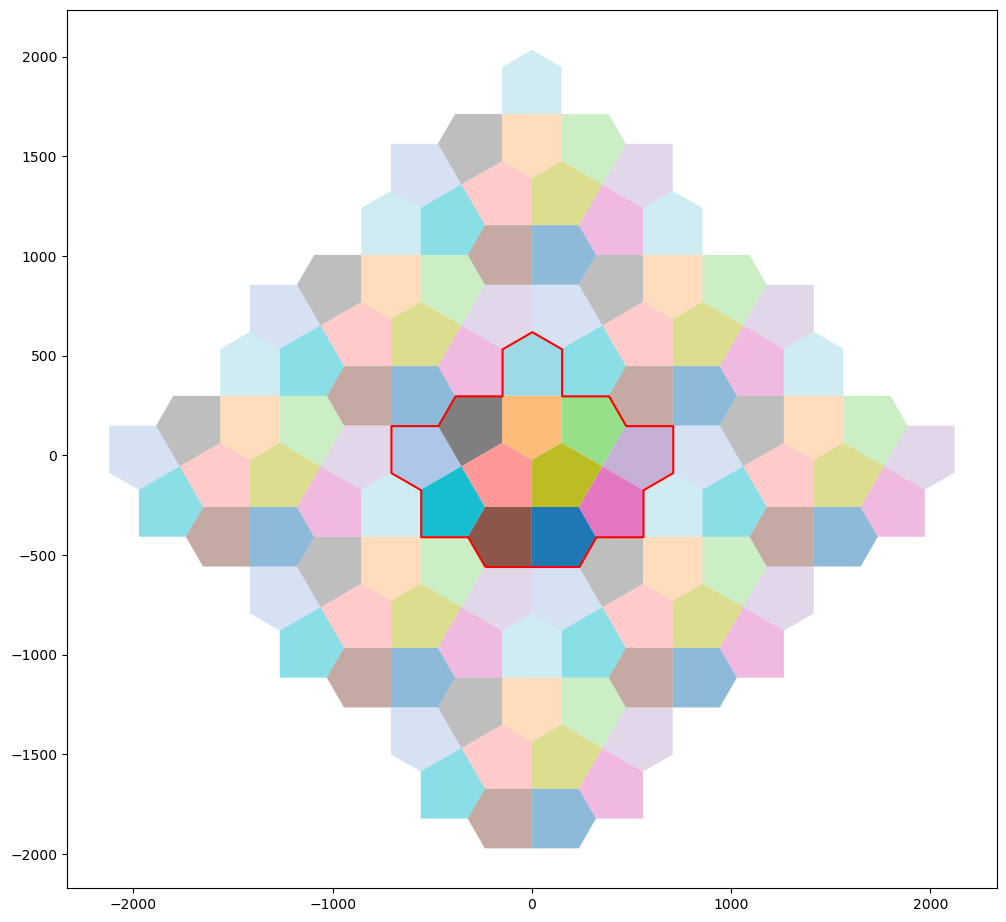

In [204]:
tile3 = copy.deepcopy(tile)
tile3.tiles = tiling_utils.get_dual_tile_unit(tile)
tile3._setup_regularised_prototile(override = True)
tile3.plot(r = 1, show_reg_prototile = True, show_prototile = False,
           show_vectors = False, cmap = "tab20", show_ids = False, 
           figsize = (12, 12))